# Wind Energy Prediction and Analysis

## Importing Basic Libraries

In [ ]:
# ! pip install pandas
# ! pip install numpy
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install keras
# ! pip install scikit-learn
# ! pip install tensorflow




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

### Reading the dataset

In [2]:
data = pd.read_csv("../dataset/T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Data Wrangling

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [4]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776282,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [5]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

## Visualization

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


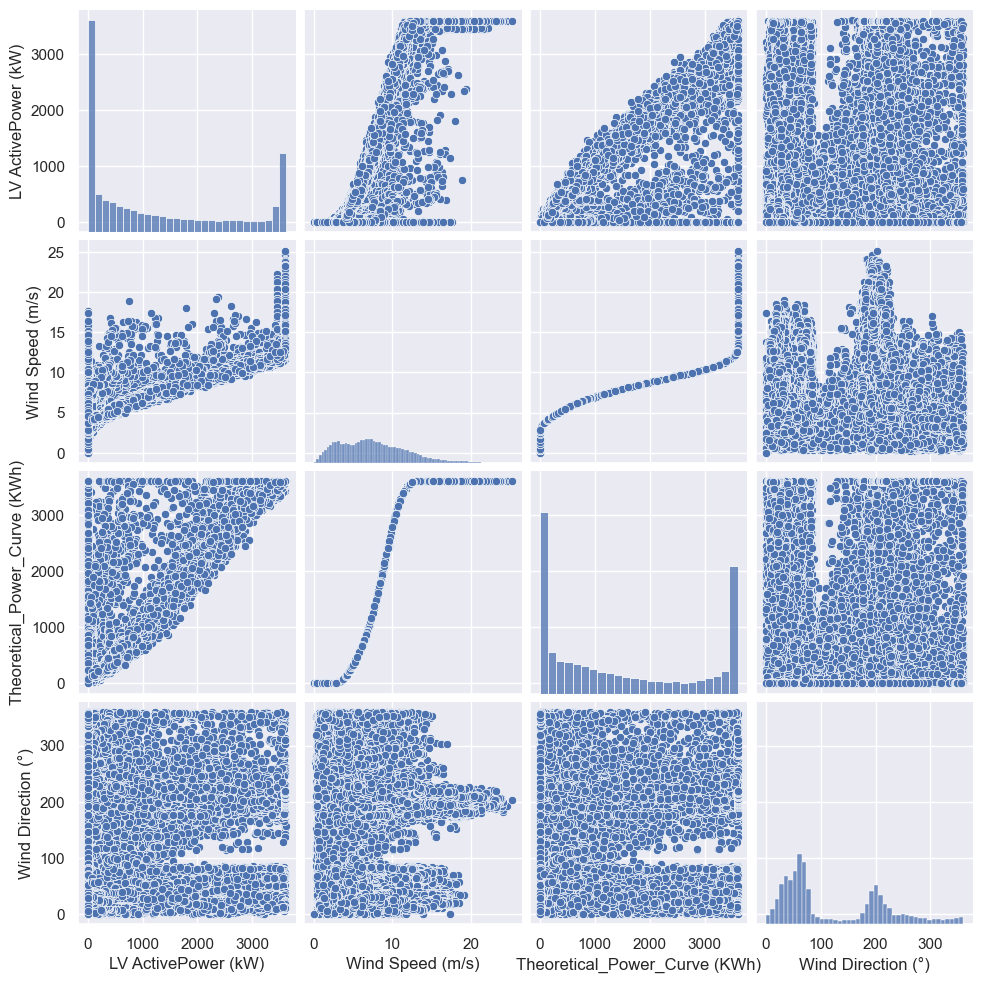

In [6]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

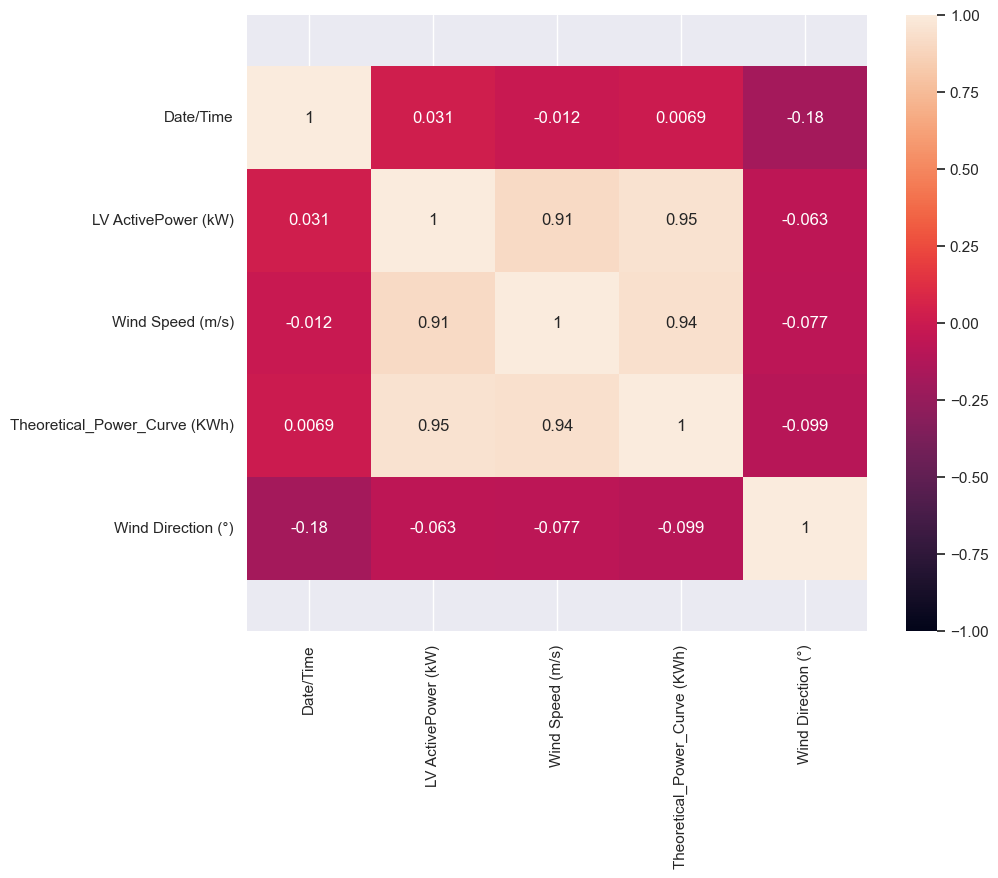

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,1.000000,0.030971,-0.012209,0.006900,-0.180336
LV ActivePower (kW),0.030971,1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),-0.012209,0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.006900,0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.180336,-0.062702,-0.077188,-0.099076,1.000000


In [7]:
#correlation between the values
data['Date/Time'] = pd.to_datetime(data['Date/Time'],format="%d %m %Y %H:%M")

corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [9]:
# Importing a visualization library
# ! pip install windrose

### Pie Bar Chart (Wind Direction VS Wind Speed)

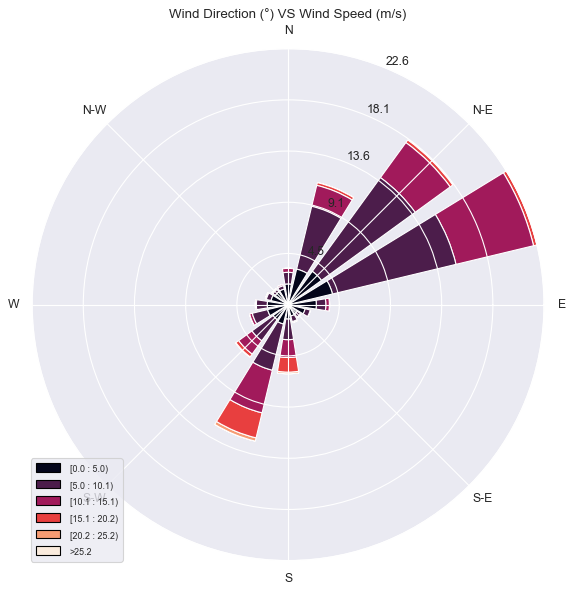

In [10]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [11]:
data['Year'] = data['Date/Time'].dt.year
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day
data['Time_Hours'] = data['Date/Time'].dt.hour
data['Time_Minutes'] = data['Date/Time'].dt.minute


### KDE Plot

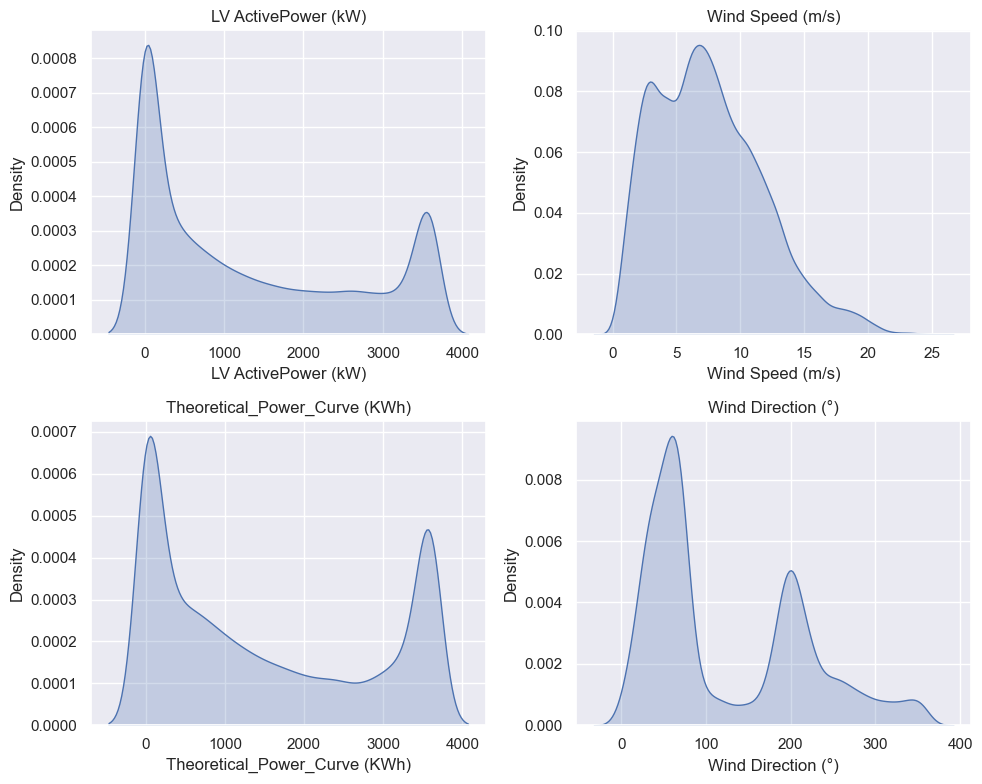

In [12]:
# Define the desired columns
target_columns = ["LV ActivePower (kW)", "Wind Speed (m/s)", "Theoretical_Power_Curve (KWh)", "Wind Direction (°)"]

# Create the plot
plt.figure(figsize=(10, 8))

# Loop through and plot each column
for i, col in enumerate(target_columns):
    # Access the column using its name
    column_data = data[col]
    
    # Create the subplot
    plt.subplot(2, 2, i + 1)

    # Plot the kernel density distribution
    sns.kdeplot(column_data, fill=True)

    # Set the title
    plt.title(col)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [13]:
# droping all the null values from the data
data = data.dropna()

## Converting the Data/Time feature in proper DateTime format

In [14]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


### Line Graph of DateTime VS Target variable

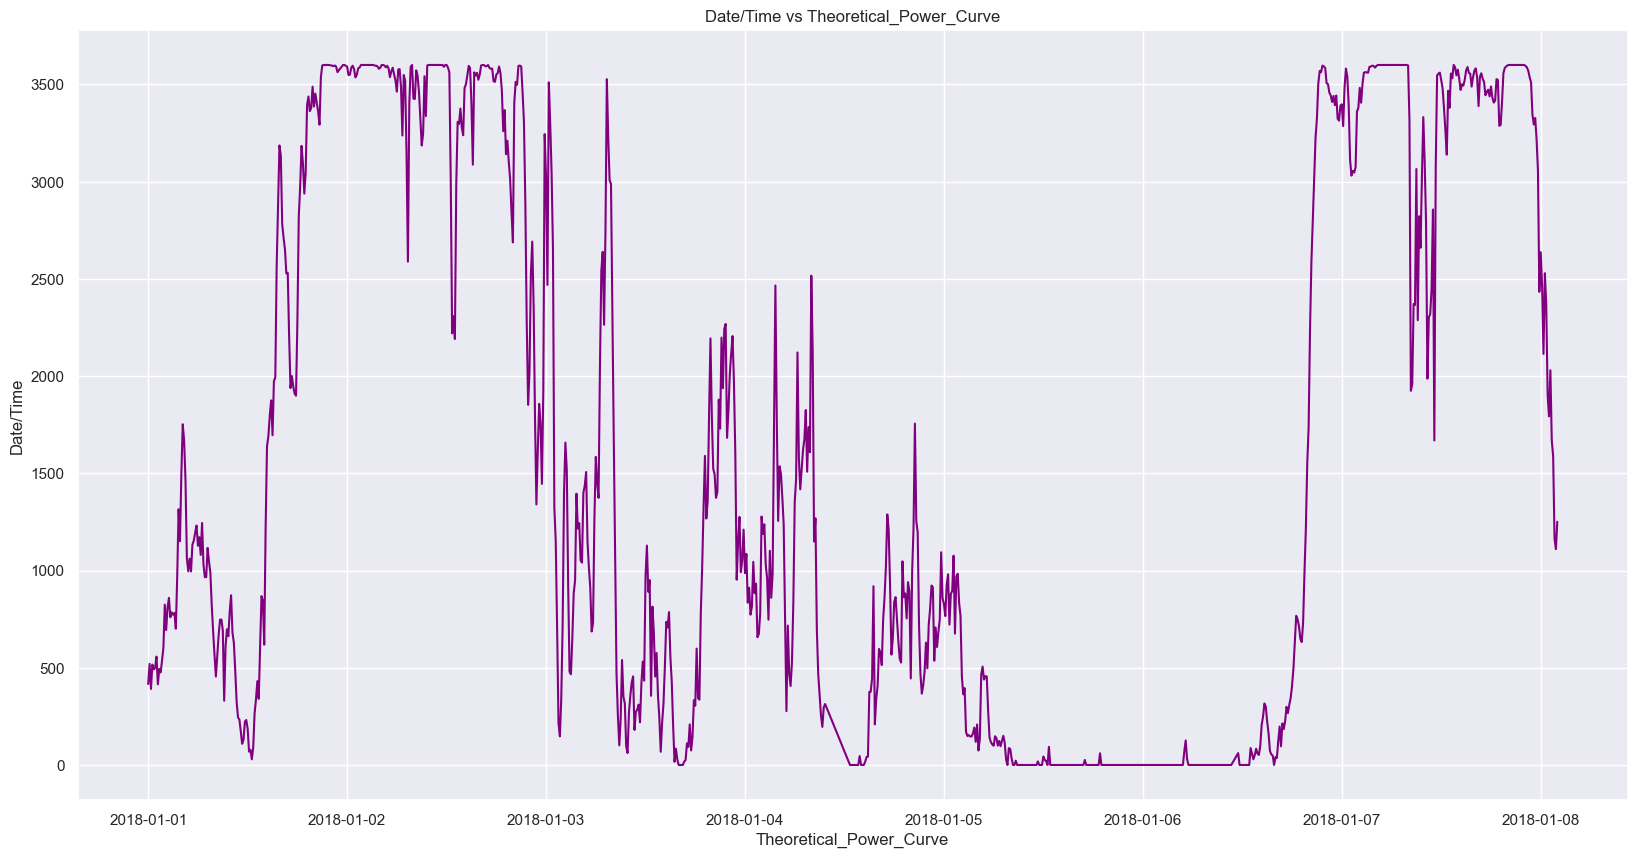

In [15]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [16]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [17]:
df = data.copy()

# Building the LSTM model

In [18]:



from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [19]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')

In [20]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [21]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [22]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [23]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [24]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [25]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [26]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    model = tf.keras.models.Sequential()
    
    # Use LSTM layer with CuDNN backend if available
    if tf.test.is_gpu_available(cuda_only=True):
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    else:
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, implementation=2))
    
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    
    # Print model summary after training
    print(model.summary())
    
    return model

In [27]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [28]:
'''Drop all the features as we will not be having any in production'''
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [29]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 21:30:00,1811.263260
2018-12-31 21:40:00,1787.100338
2018-12-31 21:50:00,2777.504103
2018-12-31 22:00:00,3025.199012
2018-12-31 22:10:00,3161.693967


In [30]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [31]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [32]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [33]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [34]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


49519/49519 [==============================] - 262s 5ms/step - loss: 0.0055
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [35]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 2s 2s/step
Hour=1, Predicted=3602.425999, Expected=3600.000000
1/1 [==============================] - 0s 124ms/step
Hour=2, Predicted=3604.016062, Expected=3600.000000
1/1 [==============================] - 0s 111ms/step
Hour=3, Predicted=3606.324512, Expected=3600.000000
1/1 [==============================] - 0s 100ms/step
Hour=4, Predicted=3607.699560, Expected=2506.112948
1/1 [==============================] - 0s 91ms/step
Hour=5, Predicted=2514.378059, Expected=1954.282949
1/1 [==============================] - 0s 80ms/step
Hour=6, Predicted=1962.672238, Expected=1128.684225
1/1 [==============================] - 0s 70ms/step
Hour=7, Predicted=1136.977914, Expected=2087.002742
1/1 [==============================] - 0s 68ms/step
Hour=8, Predicted=2095.189523, Expected=1497.144149
1/1 [==============================] - 0s 63ms/step
Hour=9, Predicted=1505.113012, Expected=3143.880909
1/1 [==============================] - 0s 59ms/step
Hour=10, Pr

1/1 [==============================] - 0s 54ms/step
Hour=79, Predicted=1273.038849, Expected=1349.485359
1/1 [==============================] - 0s 52ms/step
Hour=80, Predicted=1355.980003, Expected=1979.156533
1/1 [==============================] - 0s 46ms/step
Hour=81, Predicted=1985.651325, Expected=2697.981442
1/1 [==============================] - 0s 54ms/step
Hour=82, Predicted=2704.476347, Expected=3263.367927
1/1 [==============================] - 0s 53ms/step
Hour=83, Predicted=3269.862917, Expected=3146.717940
1/1 [==============================] - 0s 48ms/step
Hour=84, Predicted=3153.212990, Expected=3018.130808
1/1 [==============================] - 0s 73ms/step
Hour=85, Predicted=3024.625902, Expected=3300.665177
1/1 [==============================] - 0s 60ms/step
Hour=86, Predicted=3307.160280, Expected=2747.927256
1/1 [==============================] - 0s 56ms/step
Hour=87, Predicted=2754.422370, Expected=2590.529143
1/1 [==============================] - 0s 54ms/step
Hou

Hour=156, Predicted=1245.339614, Expected=2436.504152
1/1 [==============================] - 0s 56ms/step
Hour=157, Predicted=2442.998896, Expected=1829.369330
1/1 [==============================] - 0s 56ms/step
Hour=158, Predicted=1835.864074, Expected=2808.873842
1/1 [==============================] - 0s 61ms/step
Hour=159, Predicted=2815.368586, Expected=2443.197451
1/1 [==============================] - 0s 55ms/step
Hour=160, Predicted=2449.692195, Expected=1807.169085
1/1 [==============================] - 0s 60ms/step
Hour=161, Predicted=1813.663829, Expected=3128.215862
1/1 [==============================] - 0s 47ms/step
Hour=162, Predicted=3134.710606, Expected=2663.481637
1/1 [==============================] - 0s 66ms/step
Hour=163, Predicted=2669.976381, Expected=3013.534684
1/1 [==============================] - 0s 59ms/step
Hour=164, Predicted=3020.029428, Expected=2699.478367
1/1 [==============================] - 0s 56ms/step
Hour=165, Predicted=2705.973111, Expected=2512

1/1 [==============================] - 0s 59ms/step
Hour=235, Predicted=725.557203, Expected=490.146742
1/1 [==============================] - 0s 55ms/step
Hour=236, Predicted=496.641485, Expected=274.252958
1/1 [==============================] - 0s 50ms/step
Hour=237, Predicted=280.747702, Expected=194.784678
1/1 [==============================] - 0s 61ms/step
Hour=238, Predicted=201.279423, Expected=403.764000
1/1 [==============================] - 0s 49ms/step
Hour=239, Predicted=410.258744, Expected=126.788167
1/1 [==============================] - 0s 44ms/step
Hour=240, Predicted=133.282910, Expected=126.351038
1/1 [==============================] - 0s 55ms/step
Hour=241, Predicted=132.845782, Expected=124.229530
1/1 [==============================] - 0s 56ms/step
Hour=242, Predicted=130.724274, Expected=126.556186
1/1 [==============================] - 0s 51ms/step
Hour=243, Predicted=133.050930, Expected=177.237514
1/1 [==============================] - 0s 49ms/step
Hour=244, Pr

1/1 [==============================] - 0s 65ms/step
Hour=315, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 61ms/step
Hour=316, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 56ms/step
Hour=317, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 60ms/step
Hour=318, Predicted=6.494744, Expected=56.056234
1/1 [==============================] - 0s 54ms/step
Hour=319, Predicted=62.550979, Expected=47.921508
1/1 [==============================] - 0s 53ms/step
Hour=320, Predicted=54.416252, Expected=80.975877
1/1 [==============================] - 0s 77ms/step
Hour=321, Predicted=87.470622, Expected=227.808563
1/1 [==============================] - 0s 62ms/step
Hour=322, Predicted=234.303307, Expected=216.293667
1/1 [==============================] - 0s 63ms/step
Hour=323, Predicted=222.788412, Expected=99.450182
1/1 [==============================] - 0s 88ms/step
Hour=324, Predicted=105.944926, E

1/1 [==============================] - 0s 57ms/step
Hour=395, Predicted=150.165414, Expected=187.244605
1/1 [==============================] - 0s 62ms/step
Hour=396, Predicted=193.739349, Expected=64.917083
1/1 [==============================] - 0s 59ms/step
Hour=397, Predicted=71.411827, Expected=187.870575
1/1 [==============================] - 0s 48ms/step
Hour=398, Predicted=194.365320, Expected=201.007355
1/1 [==============================] - 0s 46ms/step
Hour=399, Predicted=207.502100, Expected=184.030788
1/1 [==============================] - 0s 52ms/step
Hour=400, Predicted=190.525532, Expected=79.627599
1/1 [==============================] - 0s 65ms/step
Hour=401, Predicted=86.122343, Expected=123.053612
1/1 [==============================] - 0s 54ms/step
Hour=402, Predicted=129.548355, Expected=117.692995
1/1 [==============================] - 0s 54ms/step
Hour=403, Predicted=124.187739, Expected=25.324509
1/1 [==============================] - 0s 48ms/step
Hour=404, Predict

1/1 [==============================] - 0s 59ms/step
Hour=476, Predicted=127.358133, Expected=84.183055
1/1 [==============================] - 0s 46ms/step
Hour=477, Predicted=90.677799, Expected=34.667256
1/1 [==============================] - 0s 55ms/step
Hour=478, Predicted=41.162000, Expected=19.277590
1/1 [==============================] - 0s 48ms/step
Hour=479, Predicted=25.772334, Expected=66.324557
1/1 [==============================] - 0s 57ms/step
Hour=480, Predicted=72.819301, Expected=74.693847
1/1 [==============================] - 0s 61ms/step
Hour=481, Predicted=81.188592, Expected=72.321338
1/1 [==============================] - 0s 54ms/step
Hour=482, Predicted=78.816082, Expected=63.858789
1/1 [==============================] - 0s 66ms/step
Hour=483, Predicted=70.353533, Expected=100.209648
1/1 [==============================] - 0s 52ms/step
Hour=484, Predicted=106.704392, Expected=56.202585
1/1 [==============================] - 0s 55ms/step
Hour=485, Predicted=62.6973

1/1 [==============================] - 0s 42ms/step
Hour=556, Predicted=955.128981, Expected=742.110533
1/1 [==============================] - 0s 54ms/step
Hour=557, Predicted=748.605277, Expected=593.137412
1/1 [==============================] - 0s 54ms/step
Hour=558, Predicted=599.632157, Expected=452.311322
1/1 [==============================] - 0s 55ms/step
Hour=559, Predicted=458.806065, Expected=331.252789
1/1 [==============================] - 0s 46ms/step
Hour=560, Predicted=337.747533, Expected=130.656787
1/1 [==============================] - 0s 58ms/step
Hour=561, Predicted=137.151531, Expected=131.175428
1/1 [==============================] - 0s 57ms/step
Hour=562, Predicted=137.670172, Expected=122.732663
1/1 [==============================] - 0s 49ms/step
Hour=563, Predicted=129.227408, Expected=171.008031
1/1 [==============================] - 0s 44ms/step
Hour=564, Predicted=177.502775, Expected=213.822070
1/1 [==============================] - 0s 48ms/step
Hour=565, Pr

1/1 [==============================] - 0s 47ms/step
Hour=635, Predicted=1002.128810, Expected=1558.790998
1/1 [==============================] - 0s 50ms/step
Hour=636, Predicted=1565.285742, Expected=1969.359867
1/1 [==============================] - 0s 54ms/step
Hour=637, Predicted=1975.854611, Expected=1825.485977
1/1 [==============================] - 0s 52ms/step
Hour=638, Predicted=1831.980721, Expected=1391.861688
1/1 [==============================] - 0s 54ms/step
Hour=639, Predicted=1398.356432, Expected=1119.469782
1/1 [==============================] - 0s 64ms/step
Hour=640, Predicted=1125.964526, Expected=1318.743444
1/1 [==============================] - 0s 47ms/step
Hour=641, Predicted=1325.238188, Expected=939.665447
1/1 [==============================] - 0s 58ms/step
Hour=642, Predicted=946.160192, Expected=1304.488383
1/1 [==============================] - 0s 57ms/step
Hour=643, Predicted=1310.983127, Expected=1054.911142
1/1 [==============================] - 0s 55ms/s

Hour=713, Predicted=1715.692280, Expected=1820.803194
1/1 [==============================] - 0s 55ms/step
Hour=714, Predicted=1827.297938, Expected=1202.808589
1/1 [==============================] - 0s 46ms/step
Hour=715, Predicted=1209.303333, Expected=1107.823445
1/1 [==============================] - 0s 61ms/step
Hour=716, Predicted=1114.318189, Expected=877.685315
1/1 [==============================] - 0s 51ms/step
Hour=717, Predicted=884.180059, Expected=765.340036
1/1 [==============================] - 0s 53ms/step
Hour=718, Predicted=771.834780, Expected=1427.767684
1/1 [==============================] - 0s 54ms/step
Hour=719, Predicted=1434.262428, Expected=1408.261175
1/1 [==============================] - 0s 45ms/step
Hour=720, Predicted=1414.755919, Expected=1531.260701
1/1 [==============================] - 0s 49ms/step
Hour=721, Predicted=1537.755445, Expected=1896.246296
1/1 [==============================] - 0s 41ms/step
Hour=722, Predicted=1902.741040, Expected=1434.984

Hour=793, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 51ms/step
Hour=794, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 41ms/step
Hour=795, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 43ms/step
Hour=796, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 56ms/step
Hour=797, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 56ms/step
Hour=798, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 56ms/step
Hour=799, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 52ms/step
Hour=800, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 51ms/step
Hour=801, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 53ms/step
Hour=802, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 52ms/step
Hour=875, Predicted=120.153084, Expected=275.435709
1/1 [==============================] - 0s 65ms/step
Hour=876, Predicted=281.930453, Expected=152.097165
1/1 [==============================] - 0s 54ms/step
Hour=877, Predicted=158.591909, Expected=0.000000
1/1 [==============================] - 0s 47ms/step
Hour=878, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 47ms/step
Hour=879, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 44ms/step
Hour=880, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 48ms/step
Hour=881, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 55ms/step
Hour=882, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 54ms/step
Hour=883, Predicted=6.494744, Expected=0.000000
1/1 [==============================] - 0s 61ms/step
Hour=884, Predicted=6.494744, Expected

1/1 [==============================] - 0s 79ms/step
Hour=956, Predicted=228.973007, Expected=409.420042
1/1 [==============================] - 0s 63ms/step
Hour=957, Predicted=415.914786, Expected=586.118854
1/1 [==============================] - 0s 54ms/step
Hour=958, Predicted=592.613598, Expected=570.018207
1/1 [==============================] - 0s 54ms/step
Hour=959, Predicted=576.512950, Expected=652.381931
1/1 [==============================] - 0s 63ms/step
Hour=960, Predicted=658.876676, Expected=590.510937
1/1 [==============================] - 0s 60ms/step
Hour=961, Predicted=597.005681, Expected=456.513723
1/1 [==============================] - 0s 57ms/step
Hour=962, Predicted=463.008468, Expected=637.553372
1/1 [==============================] - 0s 68ms/step
Hour=963, Predicted=644.048116, Expected=1340.607690
1/1 [==============================] - 0s 87ms/step
Hour=964, Predicted=1347.102434, Expected=1715.429019
1/1 [==============================] - 0s 62ms/step
Hour=965,

In [36]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Calculating Mean Absolute Error

In [37]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.4617020409041214


# Final Prediction Plot

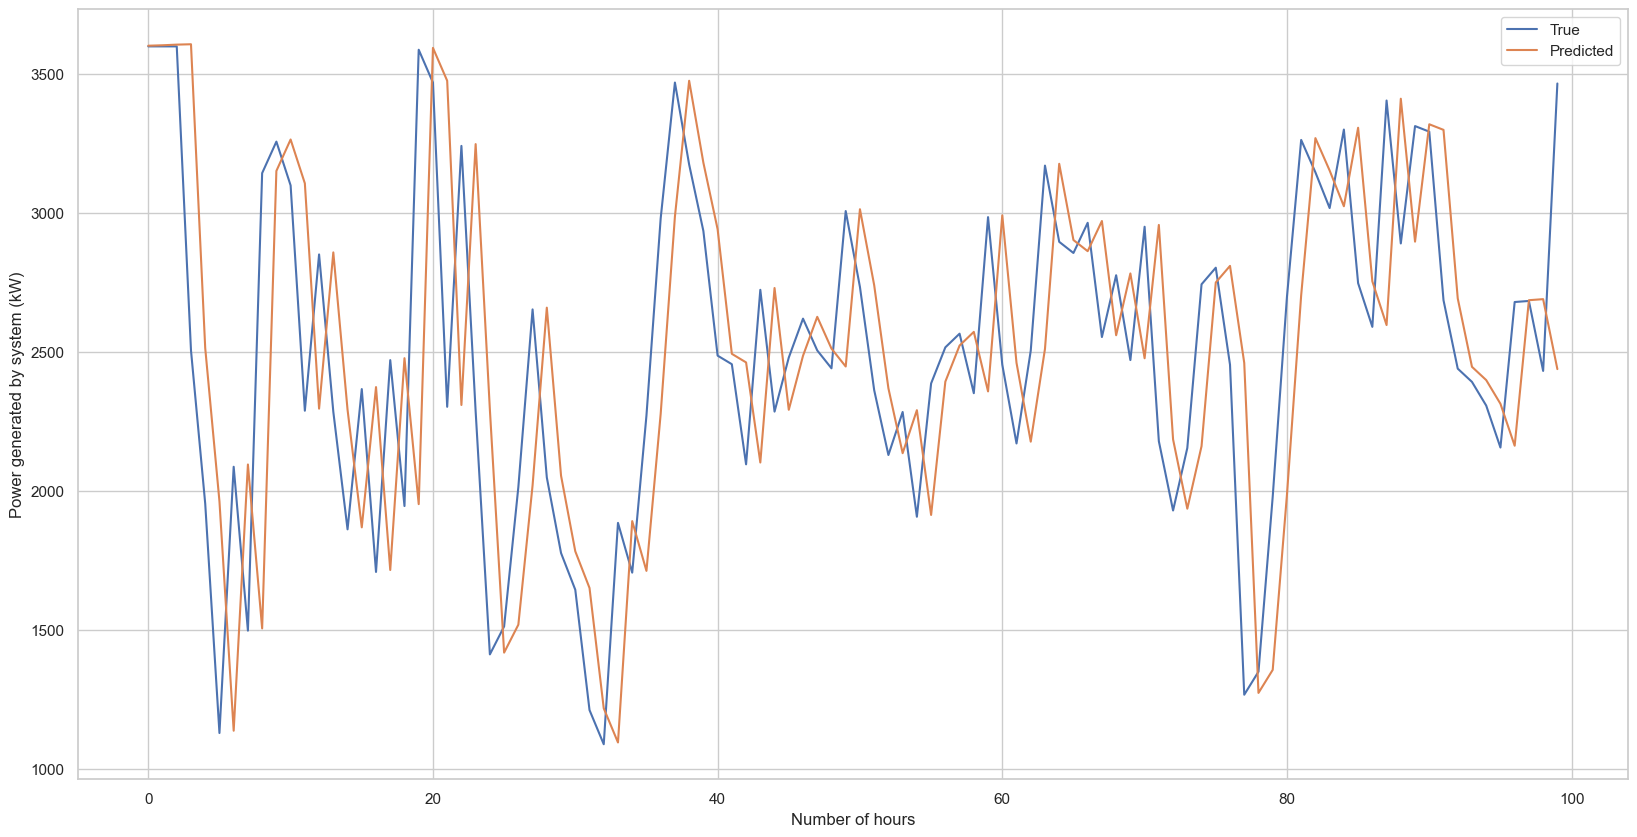

In [39]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()

In [40]:
import pickle 

In [41]:
Pkl_Filename = "Wind_Energy_Analysis_and_Prediction_using_LSTM.pkl" 

In [42]:
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lstm_model, file)

In [43]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model